# Tutorial 2: Advanced Neural Visualization

This tutorial explores advanced neural visualization techniques in BrainTools, focusing on state-space analysis, network topology, tuning curves, and sophisticated multi-panel visualizations for comprehensive neural data analysis.

## Learning Objectives

By the end of this tutorial, you will be able to:
- Visualize neural trajectories in state space for dynamical systems analysis
- Create phase portraits to understand neural dynamics
- Visualize network topology with different layout algorithms
- Generate and analyze tuning curves for stimulus selectivity
- Build comprehensive multi-panel neural analysis dashboards
- Apply advanced styling and customization techniques
- Perform comparative analysis across experimental conditions

## Setup and Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Import braintools visualization functions
import braintools

# Set random seed for reproducibility
np.random.seed(42)

# Apply neural styling theme
braintools.visualize.neural_style(fontsize=11)

## 1. Neural Trajectory Visualization

Neural trajectories visualize the evolution of neural activity in state space, revealing dynamical properties of neural networks.

In [2]:
def generate_neural_trajectory_data():
    """
    Generate realistic neural trajectory data using a dynamical system model.
    """
    # Parameters for a 3D neural oscillator
    dt = 0.01
    T = 10.0
    t = np.arange(0, T, dt)

    # Initialize state variables (representing neural population activities)
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    z = np.zeros(len(t))

    # Initial conditions
    x[0], y[0], z[0] = 1.0, 0.0, 0.0

    # Lorenz-like system with neural parameters
    sigma, rho, beta = 10.0, 28.0, 8.0 / 3.0

    for i in range(1, len(t)):
        dx = sigma * (y[i - 1] - x[i - 1])
        dy = x[i - 1] * (rho - z[i - 1]) - y[i - 1]
        dz = x[i - 1] * y[i - 1] - beta * z[i - 1]

        # Add some noise
        noise_scale = 0.1
        dx += np.random.normal(0, noise_scale)
        dy += np.random.normal(0, noise_scale)
        dz += np.random.normal(0, noise_scale)

        x[i] = x[i - 1] + dx * dt
        y[i] = y[i - 1] + dy * dt
        z[i] = z[i - 1] + dz * dt

    # Create trajectory matrix
    trajectory = np.column_stack([x, y, z])

    # Create 2D trajectory for comparison
    trajectory_2d = np.column_stack([x, y])

    return t, trajectory, trajectory_2d


# Generate trajectory data
time, trajectory_3d, trajectory_2d = generate_neural_trajectory_data()

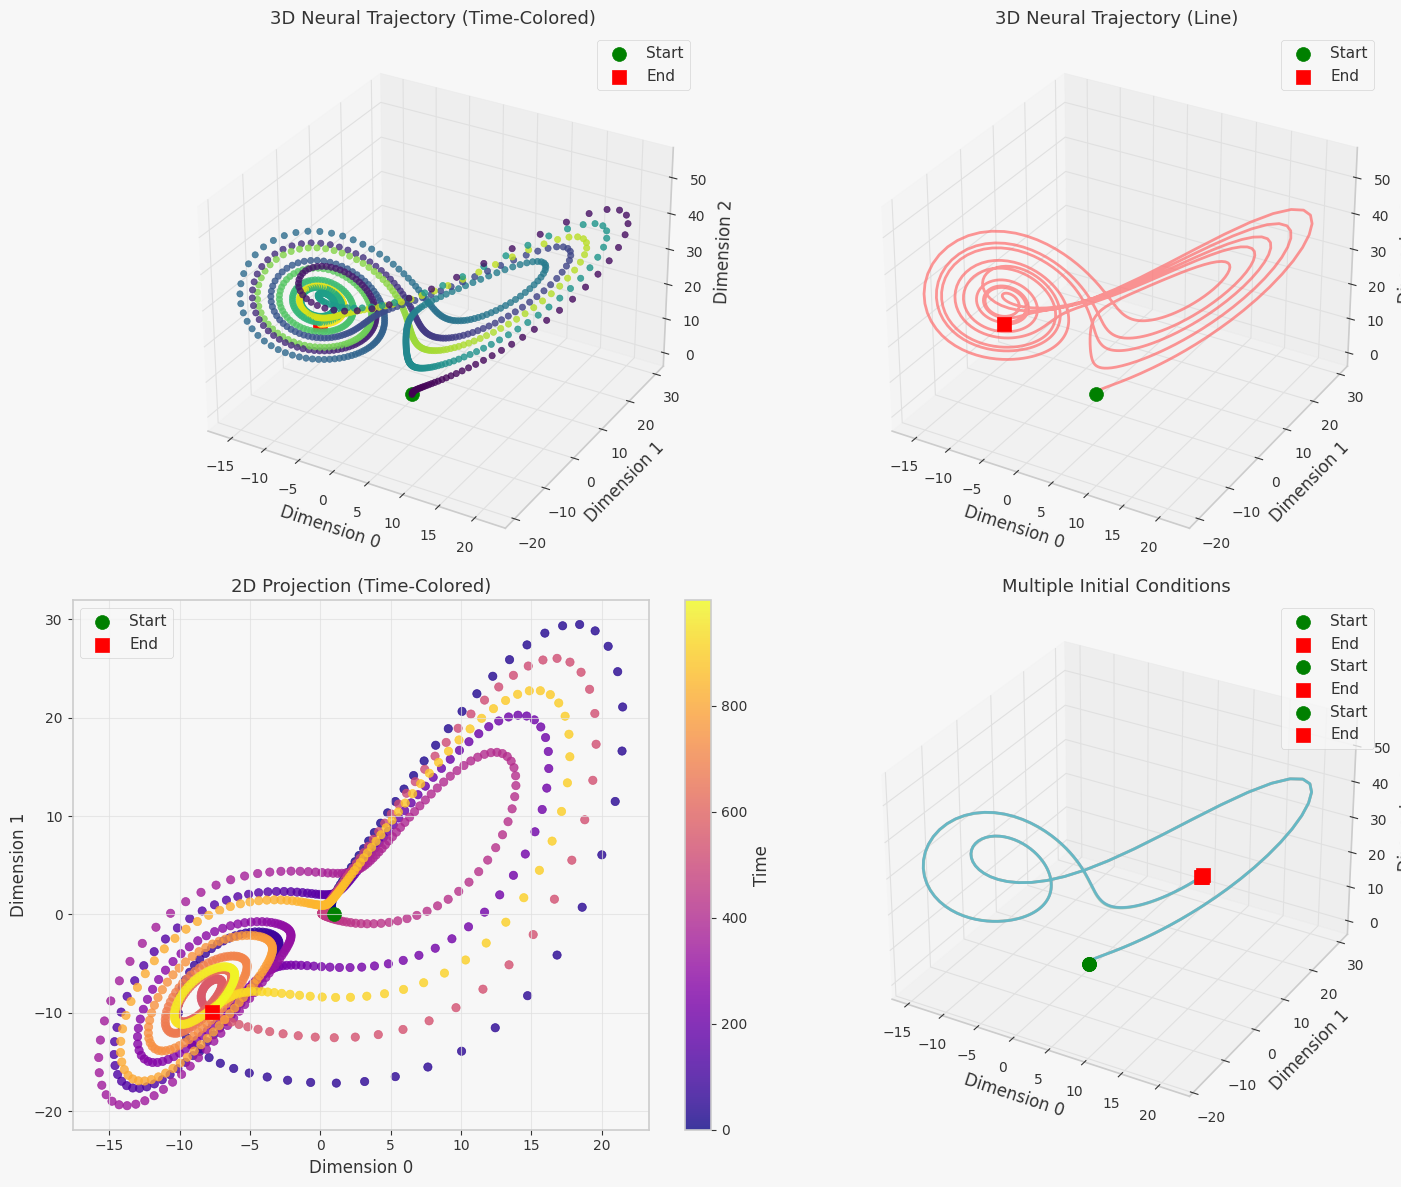


Neural Trajectory Features:
- Visualizes evolution of neural activity in state space
- Time coloring shows temporal progression
- Start (green) and end (red) markers show trajectory direction
- 3D trajectories reveal complex dynamical behavior
- Multiple trajectories can show sensitivity to initial conditions
- Useful for analyzing attractor dynamics and stability


In [3]:
# Neural trajectory visualizations
fig = plt.figure(figsize=(15, 12))

# 1. 3D trajectory with time coloring
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
braintools.visualize.neural_trajectory(trajectory_3d,
                                       ax=ax1,
                                       title="3D Neural Trajectory (Time-Colored)",
                                       time_color=True,
                                       cmap='viridis',
                                       alpha=0.8)

# 2. 3D trajectory as line plot
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
braintools.visualize.neural_trajectory(trajectory_3d,
                                       ax=ax2,
                                       title="3D Neural Trajectory (Line)",
                                       time_color=False,
                                       linewidth=2,
                                       alpha=0.7)

# 3. 2D projection with time coloring
ax3 = fig.add_subplot(2, 2, 3)
braintools.visualize.neural_trajectory(trajectory_2d,
                                       ax=ax3,
                                       title="2D Projection (Time-Colored)",
                                       time_color=True,
                                       cmap='plasma',
                                       alpha=0.8)

# 4. Multiple trajectories with different initial conditions
ax4 = fig.add_subplot(2, 2, 4, projection='3d')
for i, initial_condition in enumerate([[1, 0, 0], [0, 1, 0], [0, 0, 1]]):
    # Generate trajectory with different initial condition
    _, traj, _ = generate_neural_trajectory_data()

    # Plot first 200 points for clarity
    braintools.visualize.neural_trajectory(traj[:200],
                                           ax=ax4,
                                           title="Multiple Initial Conditions",
                                           time_color=False,
                                           alpha=0.7,
                                           linewidth=2)

plt.tight_layout()
plt.show()

print("\nNeural Trajectory Features:")
print("- Visualizes evolution of neural activity in state space")
print("- Time coloring shows temporal progression")
print("- Start (green) and end (red) markers show trajectory direction")
print("- 3D trajectories reveal complex dynamical behavior")
print("- Multiple trajectories can show sensitivity to initial conditions")
print("- Useful for analyzing attractor dynamics and stability")

## 2. Phase Portrait Analysis

Phase portraits reveal the dynamical structure of neural systems by showing trajectories and vector fields in phase space.

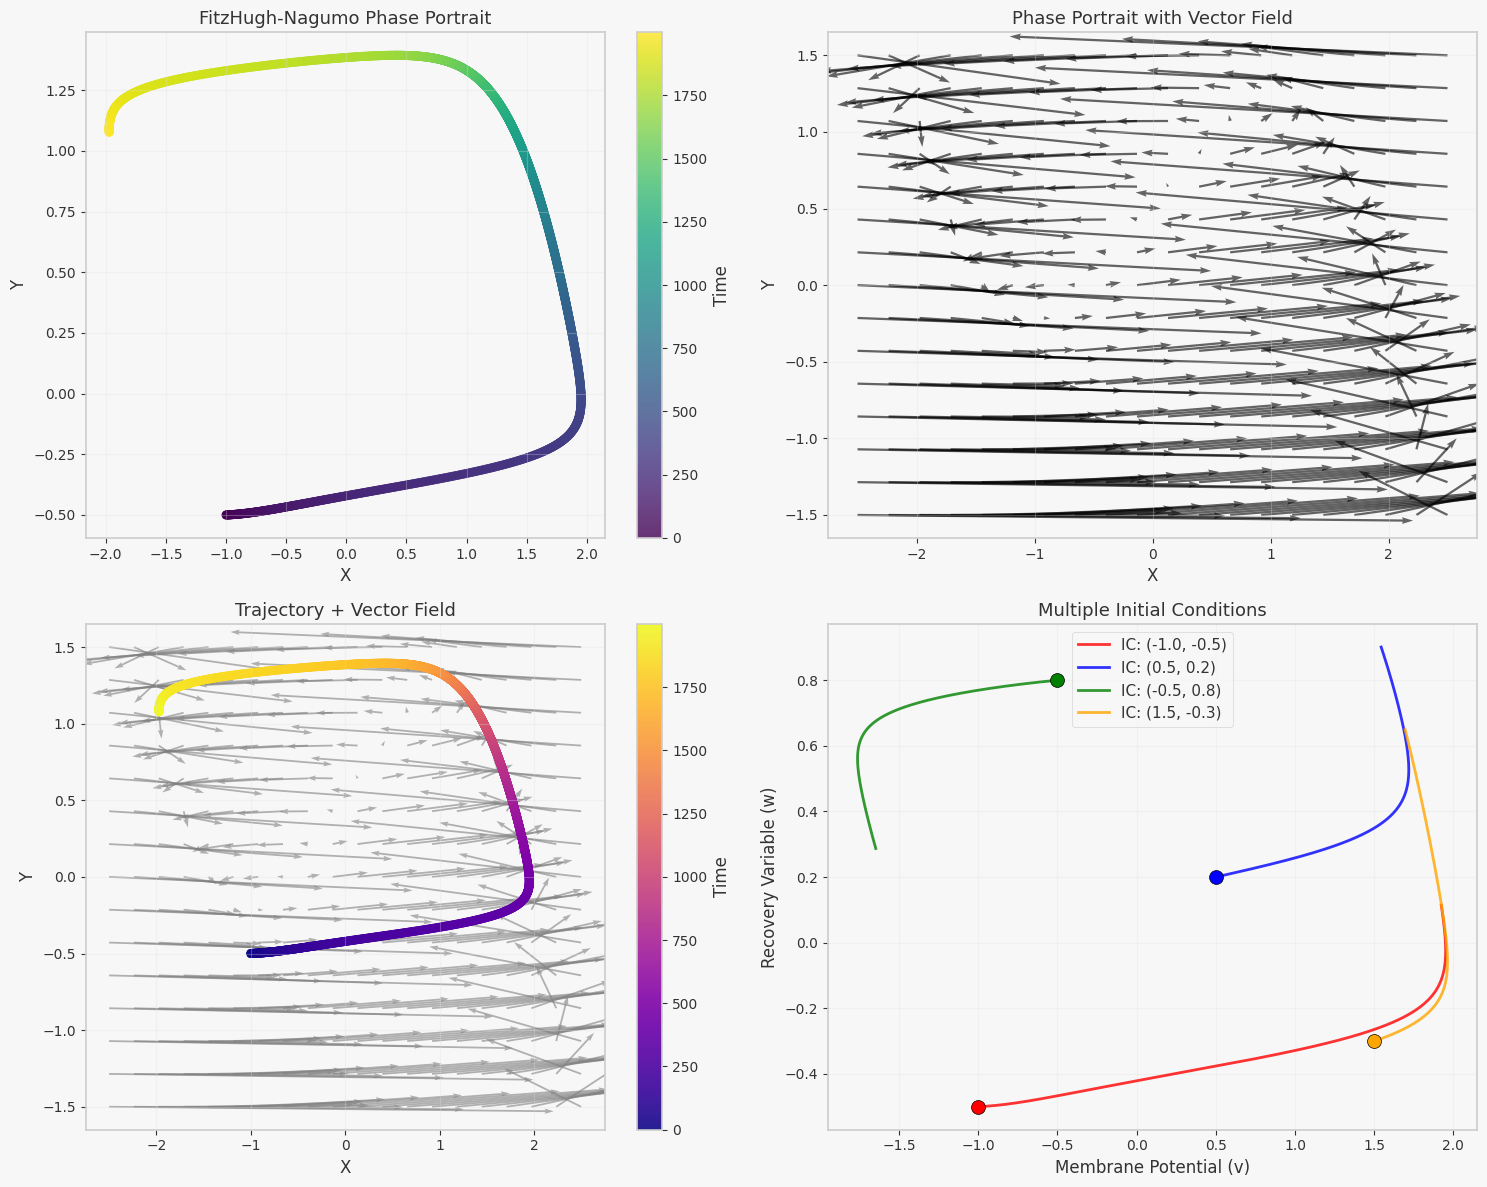


Phase Portrait Features:
- Shows relationship between state variables
- Vector fields indicate flow direction
- Trajectories reveal dynamical behavior
- Fixed points appear as convergence/divergence points
- Limit cycles appear as closed trajectories
- Useful for stability analysis and bifurcation studies


In [4]:
def generate_phase_data():
    """
    Generate data for phase portrait analysis.
    """
    # FitzHugh-Nagumo neuron model
    dt = 0.01
    T = 20.0
    t = np.arange(0, T, dt)

    # Parameters
    a, b, c = 0.7, 0.8, 12.5
    I_ext = 0.5  # External current

    # State variables: v (membrane potential), w (recovery variable)
    v = np.zeros(len(t))
    w = np.zeros(len(t))

    # Initial conditions
    v[0], w[0] = -1.0, -0.5

    # Derivatives for vector field
    dv_dt = np.zeros(len(t))
    dw_dt = np.zeros(len(t))

    for i in range(1, len(t)):
        # FitzHugh-Nagumo equations
        dv = v[i - 1] - (v[i - 1] ** 3) / 3 - w[i - 1] + I_ext
        dw = (v[i - 1] + a - b * w[i - 1]) / c

        dv_dt[i - 1] = dv
        dw_dt[i - 1] = dw

        v[i] = v[i - 1] + dv * dt
        w[i] = w[i - 1] + dw * dt

    return t, v, w, dv_dt, dw_dt


def create_vector_field(a=0.7, b=0.8, c=12.5, I_ext=0.5):
    """
    Create vector field for phase portrait.
    """
    v_range = np.linspace(-2.5, 2.5, 20)
    w_range = np.linspace(-1.5, 1.5, 15)
    V, W = np.meshgrid(v_range, w_range)

    DV = V - (V ** 3) / 3 - W + I_ext
    DW = (V + a - b * W) / c

    return V, W, DV, DW


# Generate phase portrait data
time, v, w, dv_dt, dw_dt = generate_phase_data()
V_field, W_field, DV_field, DW_field = create_vector_field()

# Phase portrait visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Basic phase portrait with trajectory
phase_data = np.column_stack([v, w])
braintools.visualize.phase_portrait(phase_data,
                                    ax=axes[0, 0],
                                    title="FitzHugh-Nagumo Phase Portrait",
                                    trajectory=True,
                                    cmap='viridis',
                                    alpha=0.8)

# 2. Phase portrait with vector field
braintools.visualize.phase_portrait(V_field,
                                    W_field,
                                    dx=DV_field,
                                    dy=DW_field,
                                    ax=axes[0, 1],
                                    title="Phase Portrait with Vector Field",
                                    trajectory=False,
                                    vector_field=True)

# 3. Combined trajectory and vector field
# First plot vector field
axes[1, 0].quiver(V_field,
                  W_field,
                  DV_field,
                  DW_field,
                  alpha=0.6,
                  scale_units='xy',
                  scale=1,
                  color='gray')
# Then plot trajectory
braintools.visualize.phase_portrait(phase_data,
                                    ax=axes[1, 0],
                                    title="Trajectory + Vector Field",
                                    trajectory=True,
                                    cmap='plasma',
                                    alpha=0.9,
                                    vector_field=False)

# 4. Multiple trajectories with different initial conditions
initial_conditions = [[-1.0, -0.5], [0.5, 0.2], [-0.5, 0.8], [1.5, -0.3]]
colors = ['red', 'blue', 'green', 'orange']

for i, (init_v, init_w) in enumerate(initial_conditions):
    # Generate trajectory for each initial condition
    v_traj = np.zeros(500)
    w_traj = np.zeros(500)
    v_traj[0], w_traj[0] = init_v, init_w

    dt = 0.01
    a, b, c, I_ext = 0.7, 0.8, 12.5, 0.5

    for j in range(1, 500):
        dv = v_traj[j - 1] - (v_traj[j - 1] ** 3) / 3 - w_traj[j - 1] + I_ext
        dw = (v_traj[j - 1] + a - b * w_traj[j - 1]) / c

        v_traj[j] = v_traj[j - 1] + dv * dt
        w_traj[j] = w_traj[j - 1] + dw * dt

    # Plot trajectory
    traj_data = np.column_stack([v_traj, w_traj])
    axes[1, 1].plot(v_traj,
                    w_traj,
                    color=colors[i],
                    alpha=0.8,
                    linewidth=2,
                    label=f'IC: ({init_v:.1f}, {init_w:.1f})')
    # Mark starting point
    axes[1, 1].scatter(init_v,
                       init_w,
                       color=colors[i],
                       s=100,
                       marker='o',
                       edgecolor='black',
                       zorder=10)

axes[1, 1].set_xlabel('Membrane Potential (v)')
axes[1, 1].set_ylabel('Recovery Variable (w)')
axes[1, 1].set_title('Multiple Initial Conditions')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPhase Portrait Features:")
print("- Shows relationship between state variables")
print("- Vector fields indicate flow direction")
print("- Trajectories reveal dynamical behavior")
print("- Fixed points appear as convergence/divergence points")
print("- Limit cycles appear as closed trajectories")
print("- Useful for stability analysis and bifurcation studies")

## 3. Network Topology Visualization

Network topology visualization reveals the structural organization of neural networks and connectivity patterns.

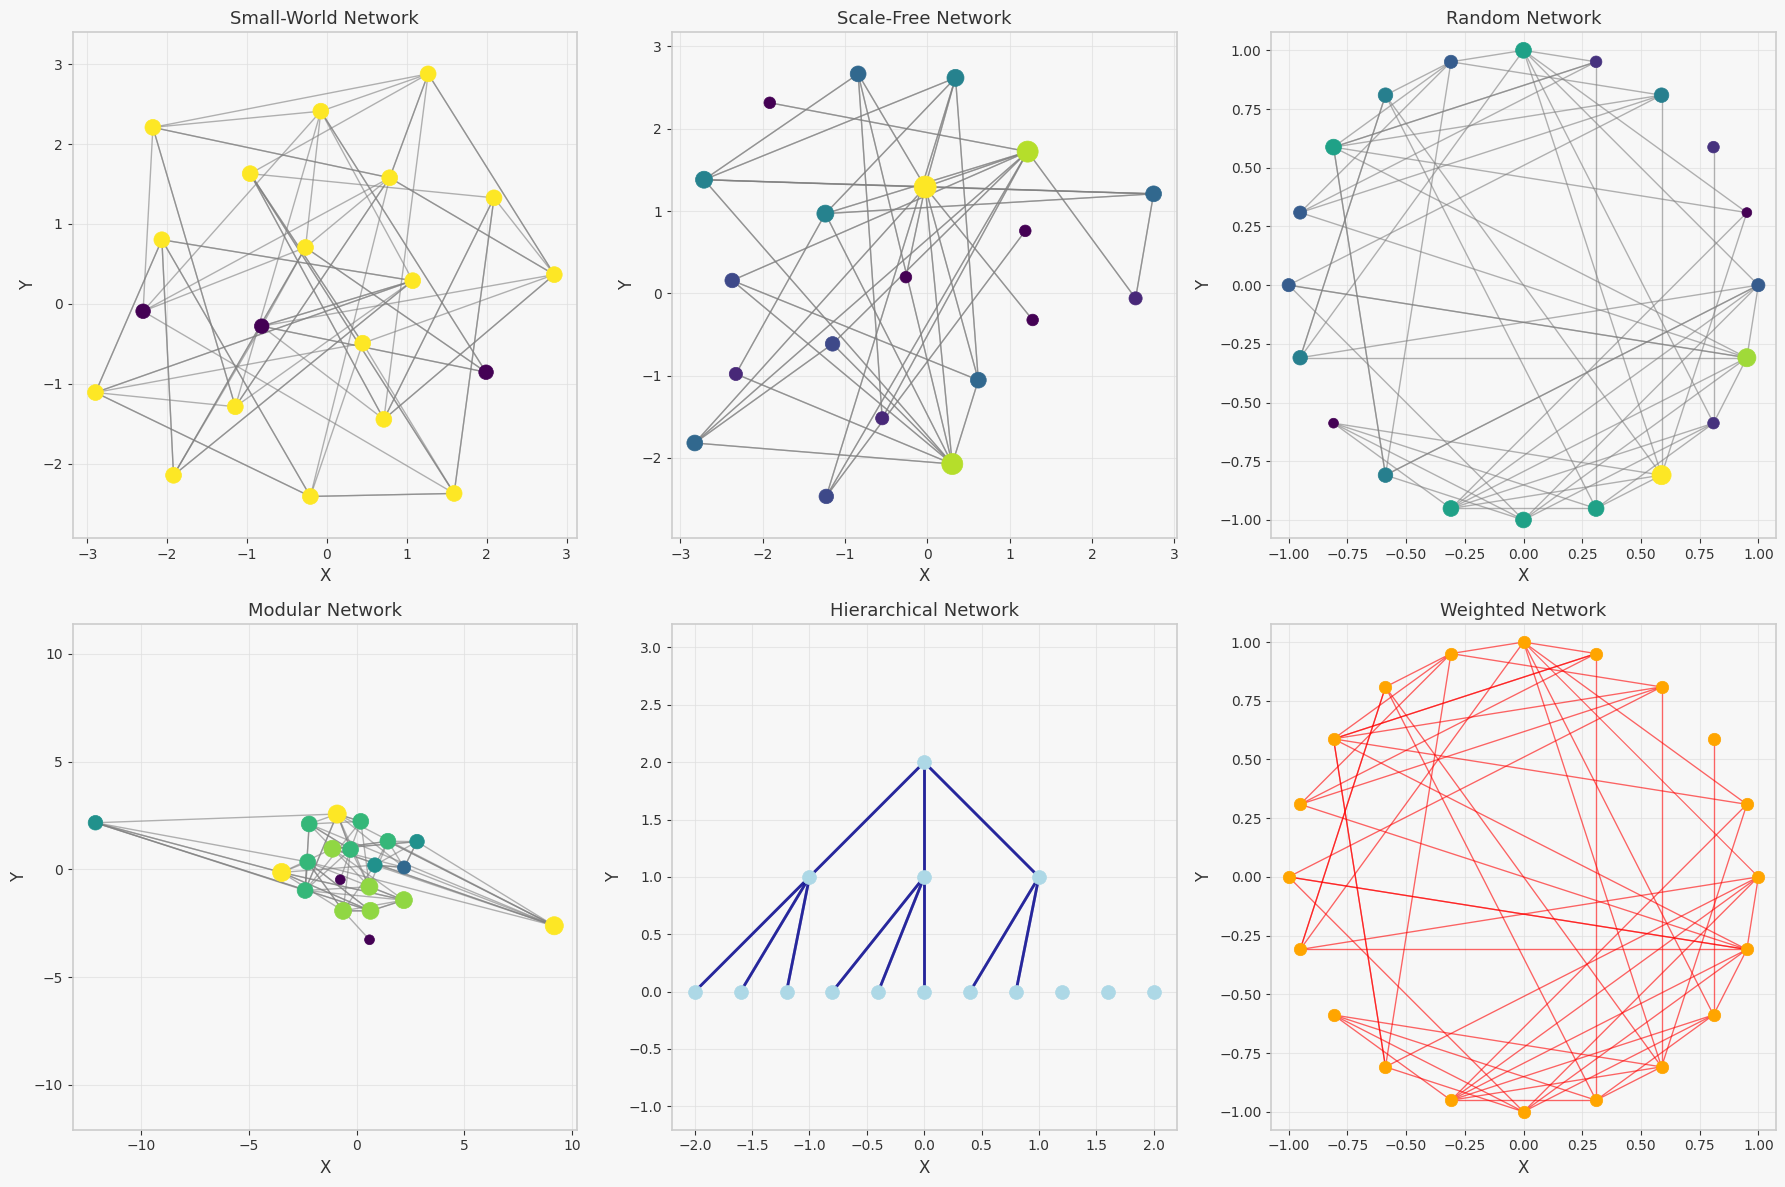


Network Topology Features:
- Different layouts reveal different structural properties
- Node sizes can represent importance (degree, betweenness, etc.)
- Node colors can show communities or functional properties
- Edge widths can represent connection strengths
- Small-world: high clustering, short path lengths
- Scale-free: power-law degree distribution, hubs
- Modular: distinct communities with sparse inter-connections
- Hierarchical: tree-like structure with clear levels


In [5]:
def generate_network_data():
    """
    Generate different types of network topologies for visualization.
    """
    n_nodes = 20

    # 1. Small-world network
    small_world = np.zeros((n_nodes, n_nodes))
    # Ring lattice base
    for i in range(n_nodes):
        for j in range(-2, 3):  # Connect to 2 neighbors on each side
            if j != 0:
                neighbor = (i + j) % n_nodes
                small_world[i, neighbor] = 1

    # Rewire some connections (small-world property)
    rewire_prob = 0.3
    for i in range(n_nodes):
        for j in range(n_nodes):
            if small_world[i, j] == 1 and np.random.rand() < rewire_prob:
                # Remove current connection
                small_world[i, j] = 0
                # Add random connection
                new_target = np.random.choice([k for k in range(n_nodes) if k != i])
                small_world[i, new_target] = 1

    # 2. Scale-free network (preferential attachment)
    scale_free = np.zeros((n_nodes, n_nodes))
    # Start with a small connected component
    scale_free[0, 1] = scale_free[1, 0] = 1

    for i in range(2, n_nodes):
        # Preferential attachment: connect to nodes with higher degree
        degrees = np.sum(scale_free, axis=1)
        if np.sum(degrees) > 0:
            probs = degrees / np.sum(degrees)
            # Connect to 1-3 existing nodes
            n_connections = np.random.randint(1, 4)
            targets = np.random.choice(i, size=min(n_connections, i),
                                       replace=False, p=probs[:i])
            for target in targets:
                scale_free[i, target] = scale_free[target, i] = 1

    # 3. Random network
    connection_prob = 0.15
    random_network = np.random.rand(n_nodes, n_nodes) < connection_prob
    random_network = random_network.astype(float)
    np.fill_diagonal(random_network, 0)  # No self-connections

    # 4. Modular network
    modular = np.zeros((n_nodes, n_nodes))
    module_size = n_nodes // 3

    # Within-module connections (dense)
    for module in range(3):
        start = module * module_size
        end = min((module + 1) * module_size, n_nodes)
        for i in range(start, end):
            for j in range(start, end):
                if i != j and np.random.rand() < 0.6:
                    modular[i, j] = 1

    # Between-module connections (sparse)
    for i in range(n_nodes):
        for j in range(n_nodes):
            if modular[i, j] == 0 and i != j and np.random.rand() < 0.05:
                modular[i, j] = 1

    return small_world, scale_free, random_network, modular


# Generate network data
small_world, scale_free, random_net, modular = generate_network_data()

# Network topology visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

networks = [small_world, scale_free, random_net, modular]
titles = ['Small-World Network', 'Scale-Free Network', 'Random Network', 'Modular Network']
layouts = ['spring', 'spring', 'circular', 'spring']

# Plot different network types
for i, (network, title, layout) in enumerate(zip(networks, titles, layouts)):
    row = i // 3
    col = i % 3

    # Calculate node properties for visualization
    degrees = np.sum(network, axis=1)
    node_sizes = 50 + degrees * 20  # Size proportional to degree

    # Color nodes by degree
    node_colors = degrees

    braintools.visualize.network_topology(network,
                                          ax=axes[row, col],
                                          title=title,
                                          layout=layout,
                                          node_sizes=node_sizes,
                                          node_colors=node_colors,
                                          edge_colors='gray',
                                          edge_widths=1.0)

# 5. Hierarchical network with custom positions
n_nodes = 15
hierarchical = np.zeros((n_nodes, n_nodes))

# Create hierarchical structure
# Level 1: 1 node (root)
# Level 2: 3 nodes
# Level 3: 11 nodes

# Connect root to level 2
for i in range(1, 4):
    hierarchical[0, i] = hierarchical[i, 0] = 1

# Connect level 2 to level 3
level3_start = 4
for i in range(1, 4):
    # Each level 2 node connects to 3-4 level 3 nodes
    n_connections = 3 if i < 3 else 2
    for j in range(n_connections):
        target = level3_start + (i - 1) * 3 + j
        if target < n_nodes:
            hierarchical[i, target] = hierarchical[target, i] = 1

# Custom positions for hierarchical layout
positions = np.zeros((n_nodes, 2))
positions[0] = [0, 2]  # Root at top
positions[1:4] = [[-1, 1], [0, 1], [1, 1]]  # Level 2
# Level 3 in bottom row
for i in range(4, n_nodes):
    x_pos = -2 + (i - 4) * 0.4
    positions[i] = [x_pos, 0]

braintools.visualize.network_topology(hierarchical,
                                      positions=positions,
                                      ax=axes[1, 1],
                                      title="Hierarchical Network",
                                      node_sizes=100,
                                      node_colors='lightblue',
                                      edge_colors='darkblue',
                                      edge_widths=2.0)

# 6. Weighted network visualization
weighted_net = random_net.copy()
# Add weights to existing connections
weighted_net[weighted_net > 0] = np.random.exponential(2, np.sum(weighted_net > 0))

# Use weights for edge widths
edge_weights = []
for i in range(len(weighted_net)):
    for j in range(len(weighted_net)):
        if weighted_net[i, j] > 0:
            edge_weights.append(weighted_net[i, j])

braintools.visualize.network_topology(weighted_net > 0,
                                      ax=axes[1, 2],
                                      title="Weighted Network",
                                      layout='circular',
                                      node_sizes=80,
                                      node_colors='orange',
                                      edge_colors='red',
                                      edge_widths=edge_weights if edge_weights else 1.0)

plt.tight_layout()
plt.show()

print("\nNetwork Topology Features:")
print("- Different layouts reveal different structural properties")
print("- Node sizes can represent importance (degree, betweenness, etc.)")
print("- Node colors can show communities or functional properties")
print("- Edge widths can represent connection strengths")
print("- Small-world: high clustering, short path lengths")
print("- Scale-free: power-law degree distribution, hubs")
print("- Modular: distinct communities with sparse inter-connections")
print("- Hierarchical: tree-like structure with clear levels")

## 4. Tuning Curve Analysis

Tuning curves reveal how neurons respond to different stimulus parameters, essential for understanding neural coding and selectivity.

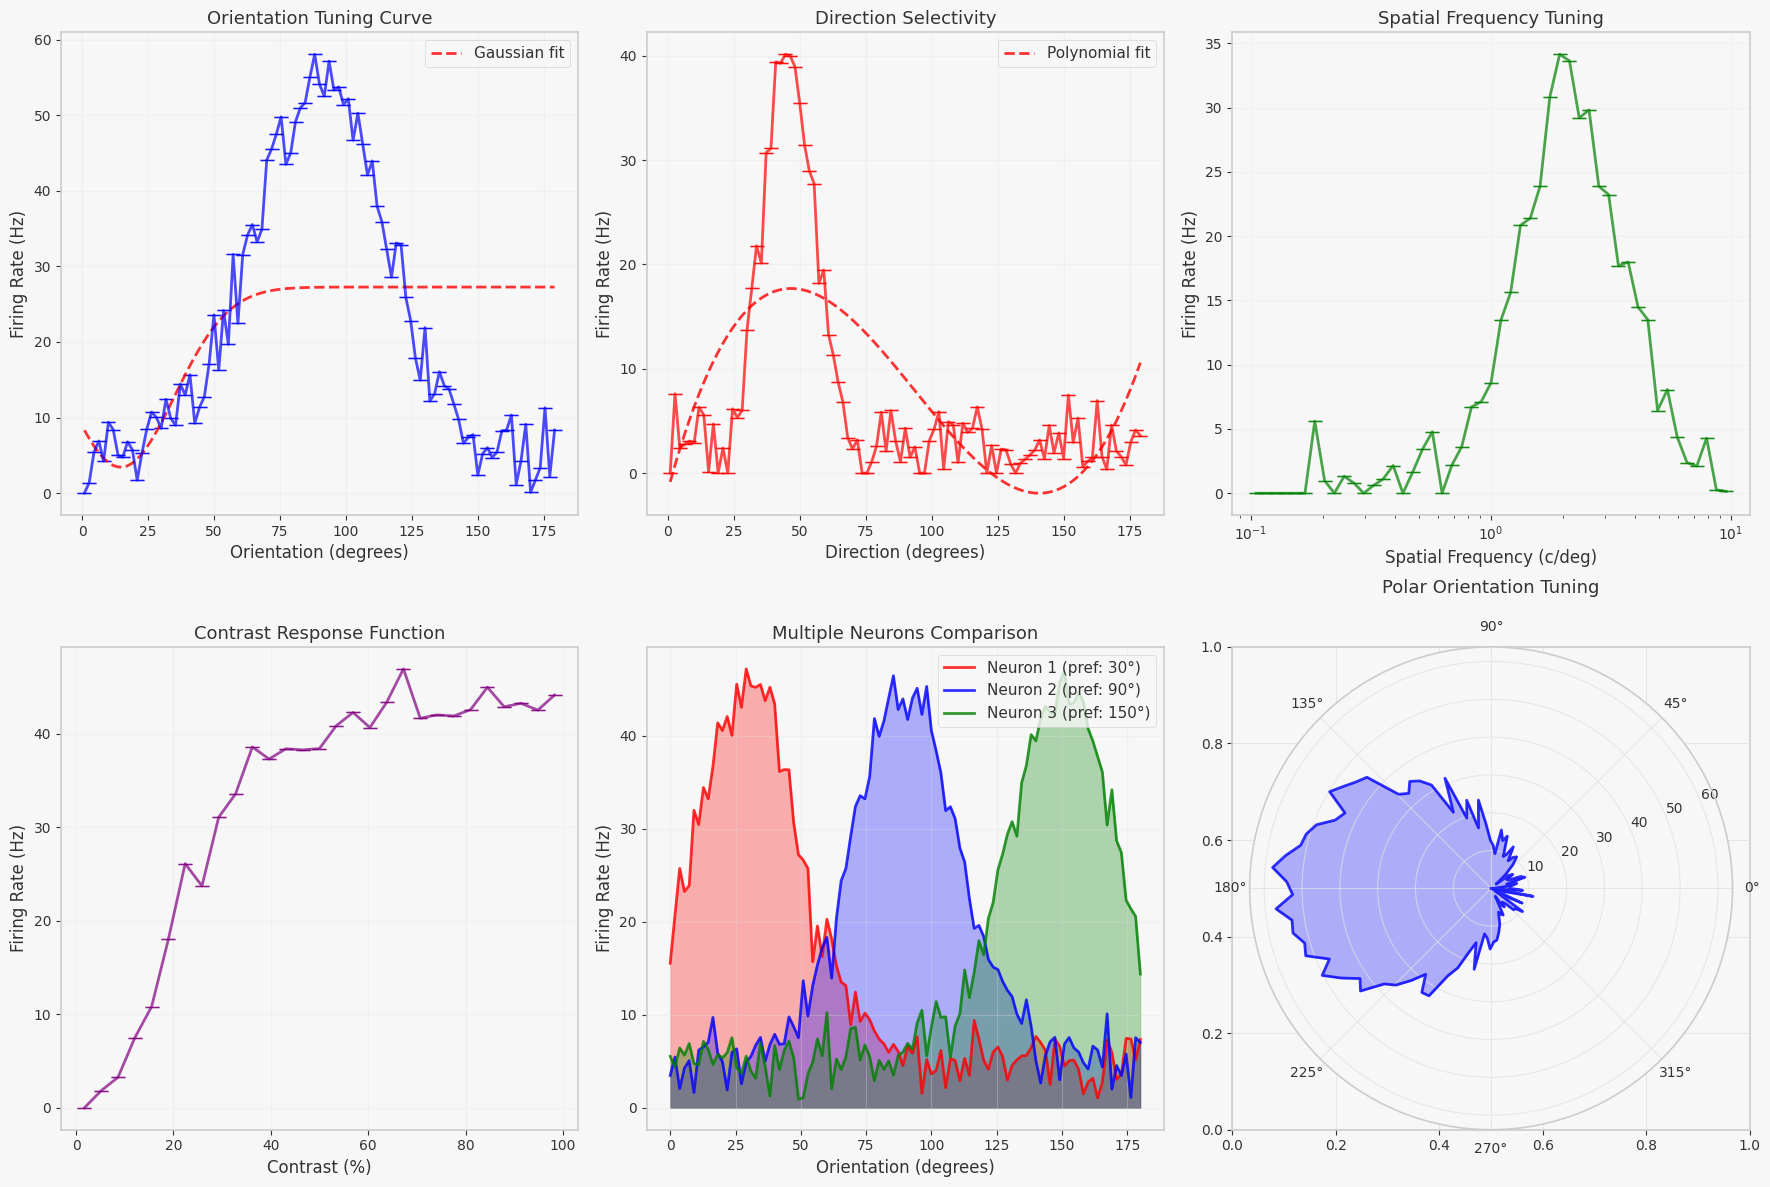


Tuning Curve Features:
- Reveals stimulus selectivity and coding properties
- Gaussian fits for symmetric tuning (orientation, spatial frequency)
- Polynomial fits for asymmetric tuning (direction selectivity)
- Error bars show response variability
- Multiple neurons reveal population coding
- Polar plots appropriate for circular variables
- Log scales useful for frequency-type variables
- Contrast functions often show saturation (Naka-Rushton)


In [6]:
def generate_tuning_data():
    """
    Generate realistic tuning curve data for different neuron types.
    """
    # Stimulus orientations (0 to 180 degrees)
    orientations = np.linspace(0, 180, 100)

    # 1. Orientation-selective neuron (Gaussian tuning)
    preferred_orientation = 90  # degrees
    tuning_width = 25  # degrees
    max_response = 50  # spikes/sec
    baseline = 5  # spikes/sec

    # Gaussian tuning curve
    orientation_response = baseline + max_response * np.exp(
        -((orientations - preferred_orientation) ** 2) / (2 * tuning_width ** 2)
    )

    # Add noise
    orientation_response += np.random.normal(0, 3, len(orientations))
    orientation_response = np.maximum(orientation_response, 0)

    # 2. Direction-selective neuron (asymmetric)
    preferred_direction = 45  # degrees
    direction_response = np.zeros(len(orientations))

    for i, ori in enumerate(orientations):
        # Sharp peak at preferred direction
        if abs(ori - preferred_direction) < 30:
            direction_response[i] = 40 * np.exp(-((ori - preferred_direction) ** 2) / 200)
        # Suppression at opposite direction
        elif abs(ori - (preferred_direction + 180) % 180) < 30:
            direction_response[i] = -5
        else:
            direction_response[i] = 2

    direction_response += np.random.normal(0, 2, len(orientations))
    direction_response = np.maximum(direction_response, 0)

    # 3. Spatial frequency tuning
    spatial_freqs = np.logspace(-1, 1, 50)  # 0.1 to 10 cycles/degree
    preferred_sf = 2.0  # cycles/degree
    sf_response = 30 * np.exp(-((np.log(spatial_freqs) - np.log(preferred_sf)) ** 2) / 0.5)
    sf_response += np.random.normal(0, 2, len(spatial_freqs))
    sf_response = np.maximum(sf_response, 0)

    # 4. Contrast response function
    contrasts = np.linspace(0, 100, 30)  # 0 to 100% contrast
    # Naka-Rushton function
    c50 = 20  # Half-saturation contrast
    rmax = 45  # Maximum response
    n = 2  # Exponent
    contrast_response = rmax * (contrasts ** n) / (contrasts ** n + c50 ** n)
    contrast_response += np.random.normal(0, 2, len(contrasts))
    contrast_response = np.maximum(contrast_response, 0)

    return (orientations, orientation_response, direction_response,
            spatial_freqs, sf_response, contrasts, contrast_response)


# Generate tuning data
(orientations, ori_response, dir_response, spatial_freqs,
 sf_response, contrasts, contrast_response) = generate_tuning_data()

# Tuning curve visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Orientation tuning with Gaussian fit
braintools.visualize.tuning_curve(orientations,
                                  ori_response,
                                  ax=axes[0, 0],
                                  title="Orientation Tuning Curve",
                                  bins=orientations,
                                  error_bars=True,
                                  fit_curve='gaussian',
                                  color='blue',
                                  xlabel="Orientation (degrees)",
                                  ylabel="Firing Rate (Hz)")

# 2. Direction selectivity
braintools.visualize.tuning_curve(orientations,
                                  dir_response,
                                  ax=axes[0, 1],
                                  title="Direction Selectivity",
                                  bins=orientations,
                                  error_bars=True,
                                  fit_curve='polynomial',
                                  color='red',
                                  xlabel="Direction (degrees)",
                                  ylabel="Firing Rate (Hz)")

# 3. Spatial frequency tuning
braintools.visualize.tuning_curve(spatial_freqs,
                                  sf_response,
                                  ax=axes[0, 2],
                                  title="Spatial Frequency Tuning",
                                  bins=spatial_freqs,
                                  error_bars=True,
                                  color='green',
                                  xlabel="Spatial Frequency (c/deg)",
                                  ylabel="Firing Rate (Hz)")
axes[0, 2].set_xscale('log')

# 4. Contrast response function
braintools.visualize.tuning_curve(contrasts,
                                  contrast_response,
                                  ax=axes[1, 0],
                                  title="Contrast Response Function",
                                  bins=contrasts,
                                  error_bars=True,
                                  color='purple',
                                  xlabel="Contrast (%)",
                                  ylabel="Firing Rate (Hz)")

# 5. Multiple neurons comparison
# Generate data for 3 neurons with different preferred orientations
preferred_oris = [30, 90, 150]
colors = ['red', 'blue', 'green']

for i, (pref_ori, color) in enumerate(zip(preferred_oris, colors)):
    # Generate tuning curve for each neuron
    response = 5 + 40 * np.exp(-((orientations - pref_ori) ** 2) / (2 * 20 ** 2))
    response += np.random.normal(0, 2, len(orientations))
    response = np.maximum(response, 0)

    # Plot on same axes
    axes[1, 1].plot(orientations, response, color=color, linewidth=2,
                    alpha=0.8, label=f'Neuron {i + 1} (pref: {pref_ori}°)')
    axes[1, 1].fill_between(orientations, response, alpha=0.3, color=color)

axes[1, 1].set_xlabel('Orientation (degrees)')
axes[1, 1].set_ylabel('Firing Rate (Hz)')
axes[1, 1].set_title('Multiple Neurons Comparison')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Polar tuning curve (for circular variables)
# Convert orientation tuning to polar coordinates
ax_polar = plt.subplot(2, 3, 6, projection='polar')
theta = np.radians(orientations * 2)  # Convert to radians, double for full circle
ax_polar.plot(theta, ori_response, 'b-', linewidth=2, alpha=0.8)
ax_polar.fill_between(theta, ori_response, alpha=0.3, color='blue')
ax_polar.set_title('Polar Orientation Tuning', pad=20)
ax_polar.set_ylim(0, max(ori_response) * 1.1)

plt.tight_layout()
plt.show()

print("\nTuning Curve Features:")
print("- Reveals stimulus selectivity and coding properties")
print("- Gaussian fits for symmetric tuning (orientation, spatial frequency)")
print("- Polynomial fits for asymmetric tuning (direction selectivity)")
print("- Error bars show response variability")
print("- Multiple neurons reveal population coding")
print("- Polar plots appropriate for circular variables")
print("- Log scales useful for frequency-type variables")
print("- Contrast functions often show saturation (Naka-Rushton)")

## 5. Advanced Multi-Panel Dashboards

Create sophisticated dashboards that combine multiple analysis techniques for comprehensive neural data exploration.

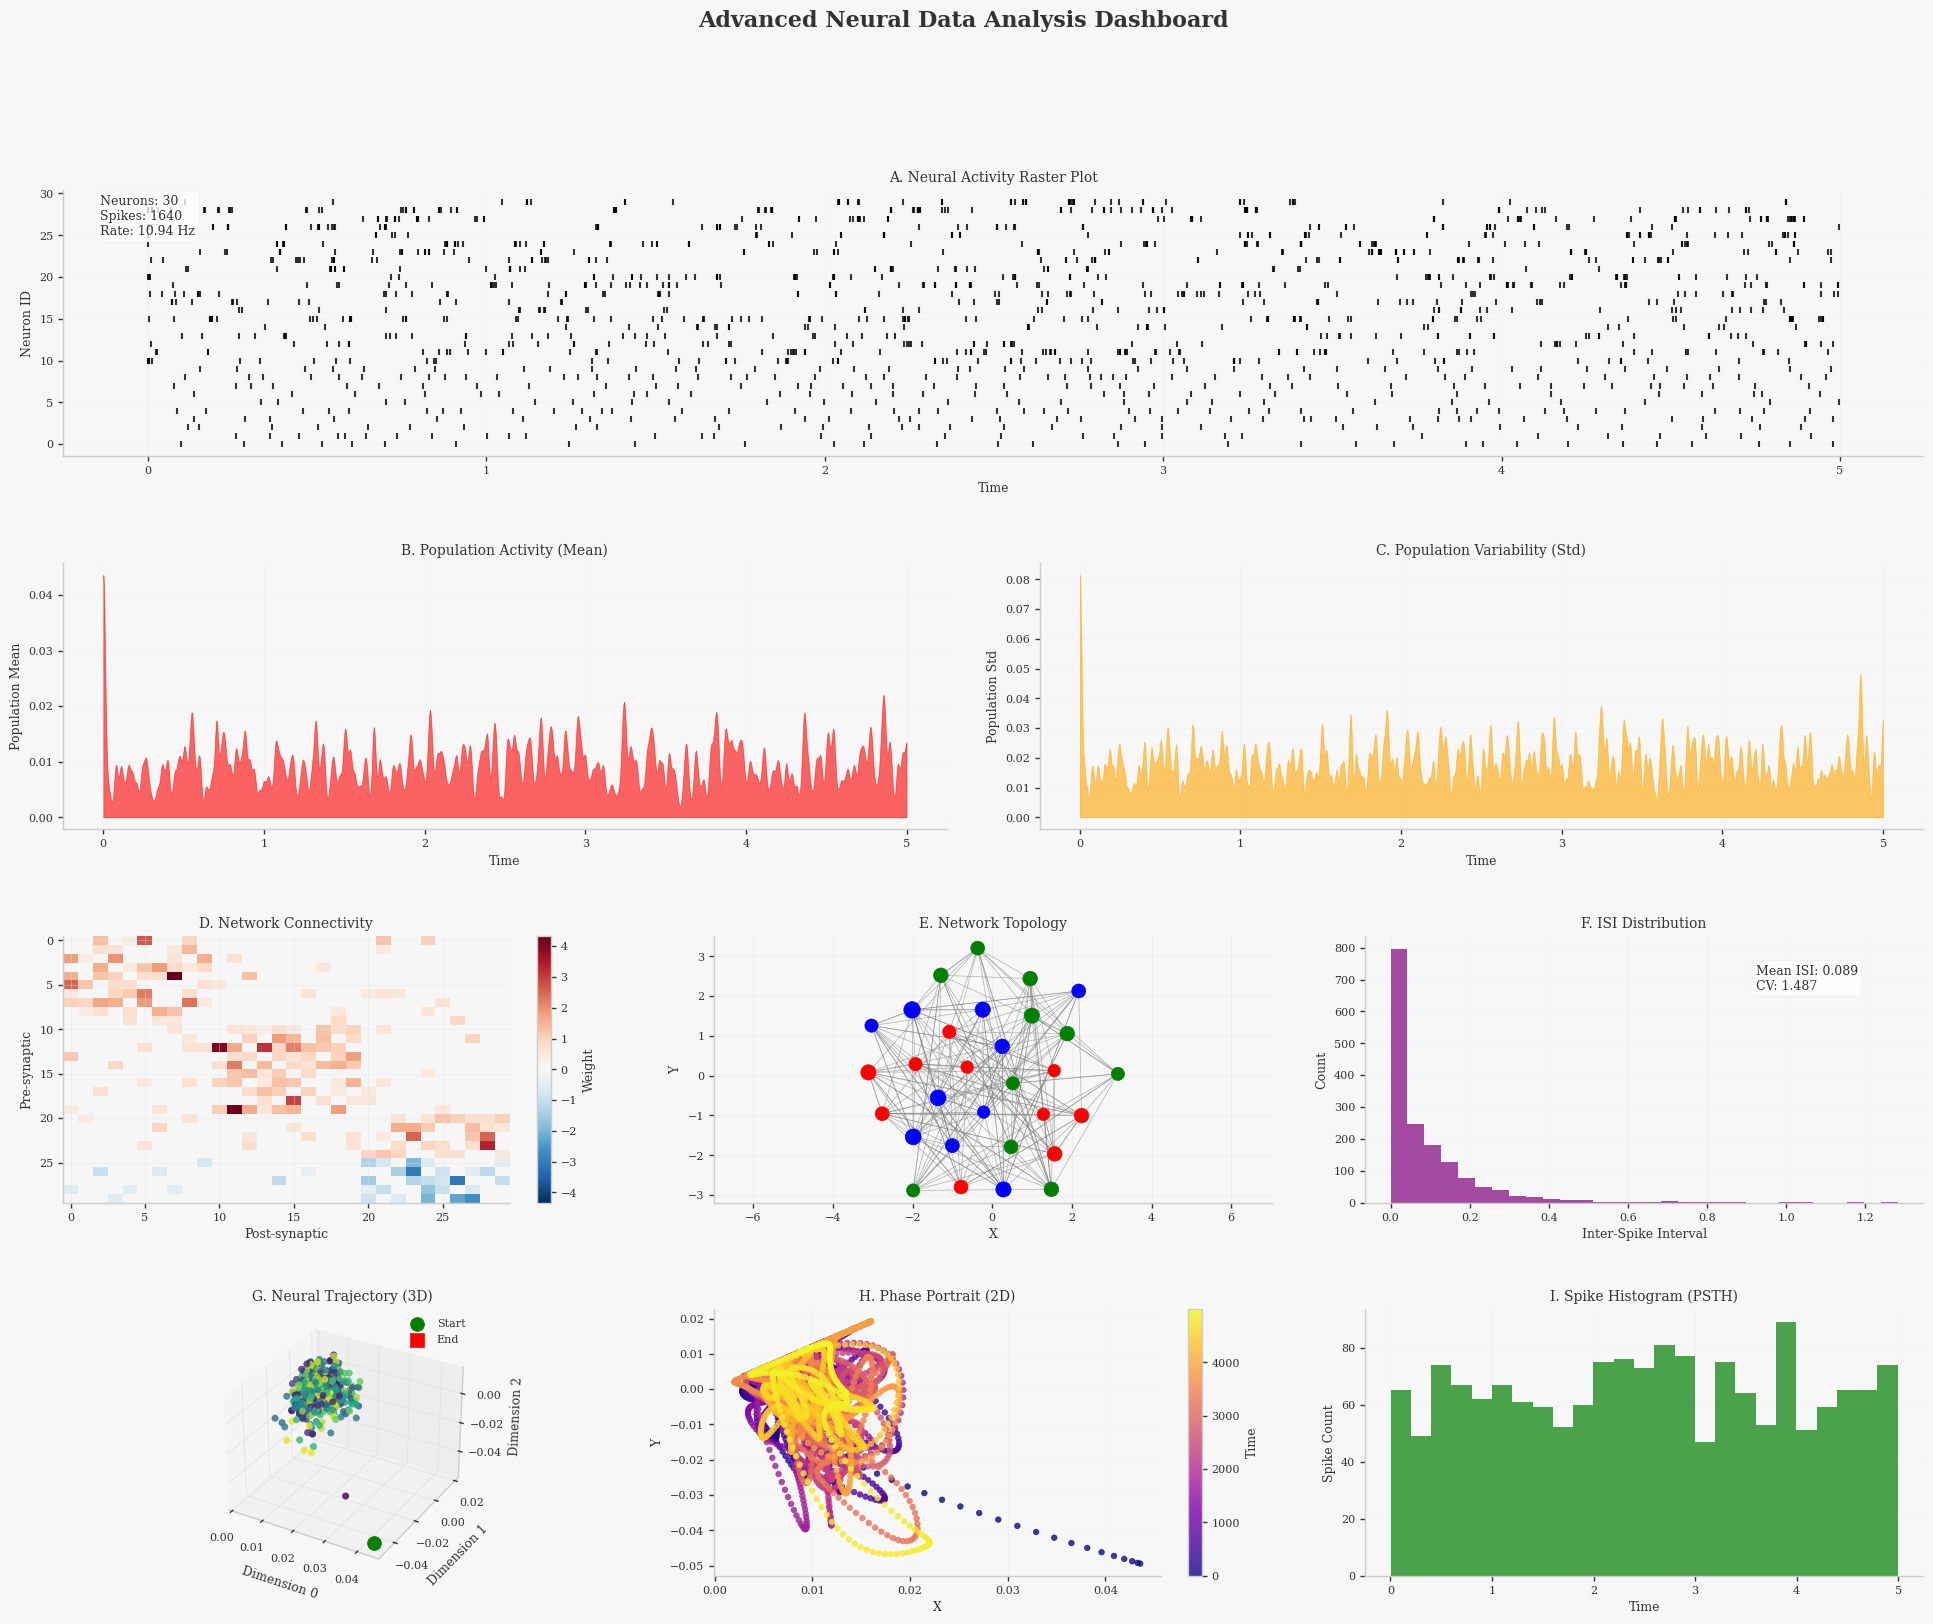


Advanced Dashboard Features:
- Comprehensive view of neural network activity and structure
- Multiple time scales: spike timing, population dynamics, trajectories
- Network analysis: connectivity, topology, community structure
- Statistical analysis: ISI distributions, firing patterns
- Dynamical analysis: phase portraits, state-space trajectories
- Color coding reveals different neuron types and communities
- Publication-ready formatting with clear panel labels


In [7]:
def generate_comprehensive_dataset():
    """
    Generate a comprehensive neural dataset for dashboard demonstration.
    """
    # Network parameters
    n_neurons = 30
    duration = 5.0
    dt = 0.001

    # Generate spike trains with different patterns
    spike_trains = []

    for i in range(n_neurons):
        # Different neuron types
        if i < 10:  # Regular spiking
            rate = 8 + np.random.normal(0, 2)
            cv = 0.5  # Regular
        elif i < 20:  # Irregular spiking
            rate = 12 + np.random.normal(0, 3)
            cv = 1.5  # Irregular
        else:  # Bursting
            rate = 15 + np.random.normal(0, 2)
            cv = 2.0  # Very irregular

        # Generate ISIs with gamma distribution
        if rate > 0:
            mean_isi = 1.0 / rate
            shape = 1.0 / (cv ** 2)
            scale = mean_isi / shape

            isis = np.random.gamma(shape, scale, int(rate * duration * 2))
            spike_times = np.cumsum(isis)
            spike_times = spike_times[spike_times < duration]
        else:
            spike_times = np.array([])

        spike_trains.append(spike_times)

    # Generate connectivity with community structure
    connectivity = np.zeros((n_neurons, n_neurons))

    # Three communities
    communities = [list(range(0, 10)), list(range(10, 20)), list(range(20, 30))]

    # Within-community connections (dense)
    for community in communities:
        for i in community:
            for j in community:
                if i != j and np.random.rand() < 0.6:
                    connectivity[i, j] = np.random.lognormal(0, 0.5)

    # Between-community connections (sparse)
    for i in range(n_neurons):
        for j in range(n_neurons):
            if connectivity[i, j] == 0 and i != j and np.random.rand() < 0.1:
                connectivity[i, j] = np.random.lognormal(-0.5, 0.3)

    # Add inhibitory connections
    inhibitory_neurons = list(range(25, 30))  # Last 5 neurons are inhibitory
    for neuron in inhibitory_neurons:
        connectivity[neuron, :] *= -1

    # Generate population activity
    time_bins = np.arange(0, duration, dt)
    pop_activity = np.zeros((len(time_bins), n_neurons))

    for i, train in enumerate(spike_trains):
        if len(train) > 0:
            spike_indices = np.digitize(train, time_bins) - 1
            spike_indices = spike_indices[spike_indices < len(time_bins)]
            pop_activity[spike_indices, i] = 1

    # Smooth population activity
    from scipy.ndimage import gaussian_filter1d
    pop_activity = gaussian_filter1d(pop_activity, sigma=10, axis=0)

    # Generate neural trajectory from population activity
    # Use PCA-like dimensionality reduction simulation
    trajectory = np.zeros((len(time_bins), 3))

    # First component: overall activity
    trajectory[:, 0] = np.mean(pop_activity, axis=1)

    # Second component: excitation-inhibition balance
    exc_activity = np.mean(pop_activity[:, :25], axis=1)
    inh_activity = np.mean(pop_activity[:, 25:], axis=1)
    trajectory[:, 1] = exc_activity - inh_activity

    # Third component: community balance
    comm1_activity = np.mean(pop_activity[:, :10], axis=1)
    comm2_activity = np.mean(pop_activity[:, 10:20], axis=1)
    trajectory[:, 2] = comm1_activity - comm2_activity

    return spike_trains, connectivity, time_bins, pop_activity, trajectory


# Generate comprehensive dataset
spike_trains, connectivity, time_bins, pop_activity, trajectory = generate_comprehensive_dataset()

# Create advanced multi-panel dashboard
fig = plt.figure(figsize=(24, 18))
gs = fig.add_gridspec(4, 6, hspace=0.4, wspace=0.4)

# Apply publication style for clean appearance
braintools.visualize.publication_style(fontsize=9)

# Panel 1: Spike raster (top row, full width)
ax1 = fig.add_subplot(gs[0, :])
braintools.visualize.spike_raster(spike_trains,
                                  ax=ax1,
                                  title="A. Neural Activity Raster Plot",
                                  show_stats=True,
                                  alpha=0.8,
                                  markersize=15)

# Panel 2: Population activity (second row, left half)
ax2 = fig.add_subplot(gs[1, :3])
braintools.visualize.population_activity(pop_activity,
                                         time=time_bins,
                                         method='mean',
                                         ax=ax2,
                                         title="B. Population Activity (Mean)",
                                         color='red',
                                         fill=True,
                                         alpha=0.6)

# Panel 3: Population activity (std) (second row, right half)
ax3 = fig.add_subplot(gs[1, 3:])
braintools.visualize.population_activity(pop_activity,
                                         time=time_bins,
                                         method='std',
                                         ax=ax3,
                                         title="C. Population Variability (Std)",
                                         color='orange',
                                         fill=True,
                                         alpha=0.6)

# Panel 4: Connectivity matrix (third row, left)
ax4 = fig.add_subplot(gs[2, :2])
braintools.visualize.connectivity_matrix(connectivity,
                                         ax=ax4,
                                         title="D. Network Connectivity",
                                         cmap='RdBu_r',
                                         center_zero=True)

# Panel 5: Network topology (third row, center)
ax5 = fig.add_subplot(gs[2, 2:4])
# Threshold for visualization
adj_matrix = (np.abs(connectivity) > 0.3).astype(float)
degrees = np.sum(adj_matrix, axis=1)
node_sizes = 30 + degrees * 10

# Color nodes by community
node_colors = ['red' if i < 10 else 'blue' if i < 20 else 'green' for i in range(30)]

braintools.visualize.network_topology(adj_matrix,
                                      ax=ax5,
                                      title="E. Network Topology",
                                      layout='spring',
                                      node_sizes=node_sizes,
                                      node_colors=node_colors,
                                      edge_colors='gray',
                                      edge_widths=0.5)

# Panel 6: ISI distribution (third row, right)
ax6 = fig.add_subplot(gs[2, 4:])
braintools.visualize.isi_distribution(spike_trains,
                                      ax=ax6,
                                      title="F. ISI Distribution",
                                      bins=30,
                                      color='purple',
                                      alpha=0.7)

# Panel 7: Neural trajectory 3D (fourth row, left)
ax7 = fig.add_subplot(gs[3, :2], projection='3d')
braintools.visualize.neural_trajectory(trajectory[::10],
                                       ax=ax7,  # Subsample for clarity
                                       title="G. Neural Trajectory (3D)",
                                       time_color=True,
                                       cmap='viridis',
                                       alpha=0.8)

# Panel 8: Phase portrait (fourth row, center)
ax8 = fig.add_subplot(gs[3, 2:4])
phase_data = trajectory[:, [0, 1]]  # Use first two components
braintools.visualize.phase_portrait(phase_data,
                                    ax=ax8,
                                    title="H. Phase Portrait (2D)",
                                    trajectory=True,
                                    cmap='plasma',
                                    alpha=0.8)

# Panel 9: Spike histogram (fourth row, right)
ax9 = fig.add_subplot(gs[3, 4:])
braintools.visualize.spike_histogram(spike_trains,
                                     ax=ax9,
                                     title="I. Spike Histogram (PSTH)",
                                     bins=25,
                                     color='green',
                                     alpha=0.7)

# Add overall title
fig.suptitle('Advanced Neural Data Analysis Dashboard',
             fontsize=16,
             fontweight='bold',
             y=0.98)

plt.show()

print("\nAdvanced Dashboard Features:")
print("- Comprehensive view of neural network activity and structure")
print("- Multiple time scales: spike timing, population dynamics, trajectories")
print("- Network analysis: connectivity, topology, community structure")
print("- Statistical analysis: ISI distributions, firing patterns")
print("- Dynamical analysis: phase portraits, state-space trajectories")
print("- Color coding reveals different neuron types and communities")
print("- Publication-ready formatting with clear panel labels")

## 6. Comparative Analysis Across Conditions

Demonstrate how to compare neural activity patterns across different experimental conditions or time periods.

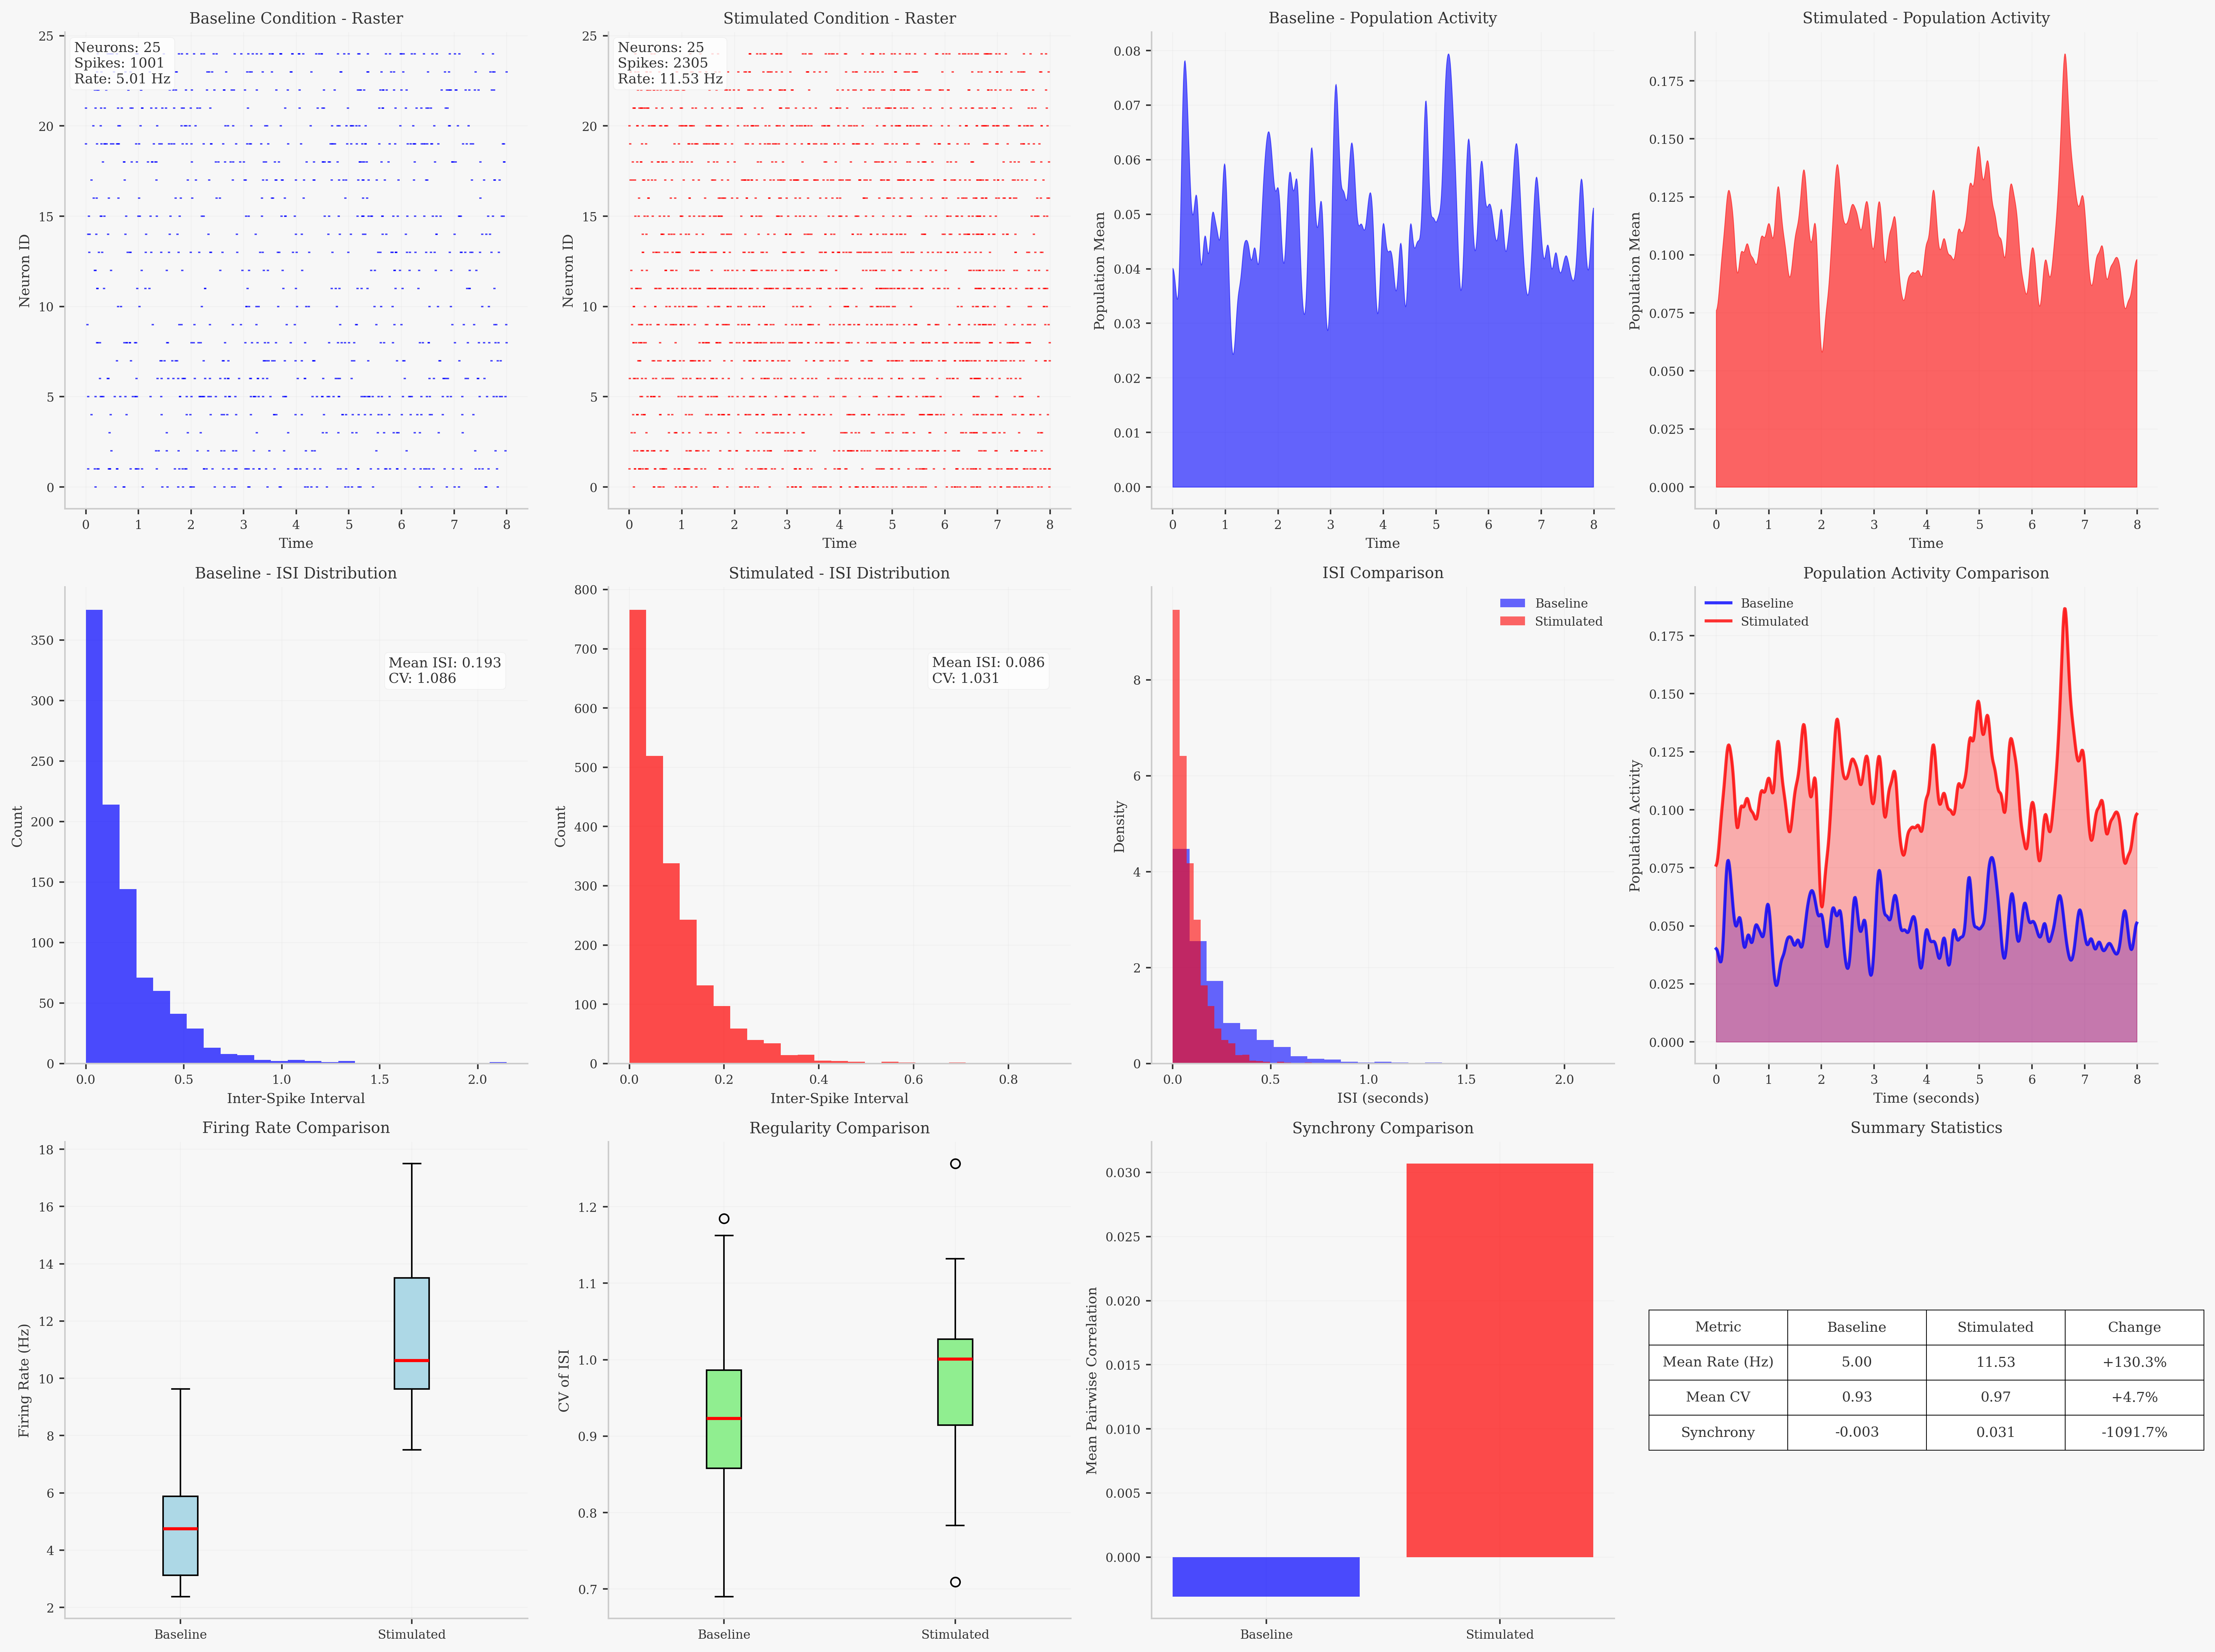


Comparative Analysis Features:
- Side-by-side visualization of different conditions
- Direct comparison plots on same axes
- Statistical comparison using box plots
- Quantitative metrics: firing rate, regularity, synchrony
- Summary statistics table for key findings
- Reveals condition-dependent changes in neural activity
- Demonstrates stimulation effects on firing patterns


In [8]:
def generate_condition_data():
    """
    Generate neural data for two different experimental conditions.
    """
    n_neurons = 25
    duration = 8.0

    # Condition 1: Baseline (lower activity)
    baseline_trains = []
    for i in range(n_neurons):
        rate = 3 + np.random.exponential(2)  # Low, variable rates
        n_spikes = np.random.poisson(rate * duration)
        if n_spikes > 0:
            spike_times = np.sort(np.random.uniform(0, duration, n_spikes))
        else:
            spike_times = np.array([])
        baseline_trains.append(spike_times)

    # Condition 2: Stimulated (higher, more synchronized activity)
    stimulated_trains = []
    # Add some global synchronization events
    sync_events = np.random.uniform(1, 7, 5)  # 5 synchronization events

    for i in range(n_neurons):
        rate = 8 + np.random.exponential(3)  # Higher rates
        n_spikes = np.random.poisson(rate * duration)

        if n_spikes > 0:
            spike_times = np.sort(np.random.uniform(0, duration, n_spikes))

            # Add synchronized spikes
            if np.random.rand() < 0.7:  # 70% of neurons participate in sync
                sync_spikes = sync_events + np.random.normal(0, 0.05, len(sync_events))
                sync_spikes = sync_spikes[(sync_spikes > 0) & (sync_spikes < duration)]
                spike_times = np.concatenate([spike_times, sync_spikes])
                spike_times = np.sort(spike_times)
        else:
            spike_times = np.array([])

        stimulated_trains.append(spike_times)

    return baseline_trains, stimulated_trains


# Generate condition data
baseline_trains, stimulated_trains = generate_condition_data()

# Comparative analysis visualization
fig, axes = plt.subplots(3, 4, figsize=(20, 15))

# Row 1: Spike rasters
braintools.visualize.spike_raster(baseline_trains,
                                  ax=axes[0, 0],
                                  title="Baseline Condition - Raster",
                                  color='blue',
                                  alpha=0.7,
                                  show_stats=True)

braintools.visualize.spike_raster(stimulated_trains,
                                  ax=axes[0, 1],
                                  title="Stimulated Condition - Raster",
                                  color='red',
                                  alpha=0.7,
                                  show_stats=True)

# Row 1: Population activity comparison
# Generate population activity for both conditions
dt = 0.01
duration = 8.0
time_bins = np.arange(0, duration, dt)


def spikes_to_population(trains, time_bins):
    pop_matrix = np.zeros((len(time_bins), len(trains)))
    for i, train in enumerate(trains):
        if len(train) > 0:
            indices = np.digitize(train, time_bins) - 1
            indices = indices[indices < len(time_bins)]
            pop_matrix[indices, i] = 1
    return pop_matrix


baseline_pop = spikes_to_population(baseline_trains, time_bins)
stimulated_pop = spikes_to_population(stimulated_trains, time_bins)

# Smooth for visualization
from scipy.ndimage import gaussian_filter1d

baseline_smooth = gaussian_filter1d(baseline_pop, sigma=5, axis=0)
stimulated_smooth = gaussian_filter1d(stimulated_pop, sigma=5, axis=0)

braintools.visualize.population_activity(baseline_smooth,
                                         time=time_bins,
                                         method='mean',
                                         ax=axes[0, 2],
                                         title="Baseline - Population Activity",
                                         color='blue',
                                         alpha=0.6)

braintools.visualize.population_activity(stimulated_smooth,
                                         time=time_bins,
                                         method='mean',
                                         ax=axes[0, 3],
                                         title="Stimulated - Population Activity",
                                         color='red',
                                         alpha=0.6)

# Row 2: ISI distributions comparison
braintools.visualize.isi_distribution(baseline_trains,
                                      ax=axes[1, 0],
                                      title="Baseline - ISI Distribution",
                                      bins=25,
                                      color='blue',
                                      alpha=0.7)

braintools.visualize.isi_distribution(stimulated_trains,
                                      ax=axes[1, 1],
                                      title="Stimulated - ISI Distribution",
                                      bins=25,
                                      color='red',
                                      alpha=0.7)

# Row 2: Direct comparison plots
# ISI comparison on same axes
baseline_isis = []
stimulated_isis = []

for train in baseline_trains:
    if len(train) > 1:
        baseline_isis.extend(np.diff(train))

for train in stimulated_trains:
    if len(train) > 1:
        stimulated_isis.extend(np.diff(train))

axes[1, 2].hist(baseline_isis, bins=25, alpha=0.6, color='blue',
                label='Baseline', density=True)
axes[1, 2].hist(stimulated_isis, bins=25, alpha=0.6, color='red',
                label='Stimulated', density=True)
axes[1, 2].set_xlabel('ISI (seconds)')
axes[1, 2].set_ylabel('Density')
axes[1, 2].set_title('ISI Comparison')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

# Population activity comparison on same axes
baseline_mean = np.mean(baseline_smooth, axis=1)
stimulated_mean = np.mean(stimulated_smooth, axis=1)

axes[1, 3].plot(time_bins, baseline_mean, color='blue', alpha=0.8,
                linewidth=2, label='Baseline')
axes[1, 3].plot(time_bins, stimulated_mean, color='red', alpha=0.8,
                linewidth=2, label='Stimulated')
axes[1, 3].fill_between(time_bins, baseline_mean, alpha=0.3, color='blue')
axes[1, 3].fill_between(time_bins, stimulated_mean, alpha=0.3, color='red')
axes[1, 3].set_xlabel('Time (seconds)')
axes[1, 3].set_ylabel('Population Activity')
axes[1, 3].set_title('Population Activity Comparison')
axes[1, 3].legend()
axes[1, 3].grid(True, alpha=0.3)

# Row 3: Statistical comparisons
# Firing rate comparison
baseline_rates = [len(train) / 8.0 for train in baseline_trains]
stimulated_rates = [len(train) / 8.0 for train in stimulated_trains]

axes[2, 0].boxplot([baseline_rates, stimulated_rates],
                   tick_labels=['Baseline', 'Stimulated'],
                   patch_artist=True,
                   boxprops=dict(facecolor='lightblue'),
                   medianprops=dict(color='red', linewidth=2))
axes[2, 0].set_ylabel('Firing Rate (Hz)')
axes[2, 0].set_title('Firing Rate Comparison')
axes[2, 0].grid(True, alpha=0.3)

# CV of ISI comparison
baseline_cvs = []
stimulated_cvs = []

for train in baseline_trains:
    if len(train) > 2:
        isis = np.diff(train)
        cv = np.std(isis) / np.mean(isis) if np.mean(isis) > 0 else 0
        baseline_cvs.append(cv)

for train in stimulated_trains:
    if len(train) > 2:
        isis = np.diff(train)
        cv = np.std(isis) / np.mean(isis) if np.mean(isis) > 0 else 0
        stimulated_cvs.append(cv)

axes[2, 1].boxplot([baseline_cvs, stimulated_cvs],
                   tick_labels=['Baseline', 'Stimulated'],
                   patch_artist=True,
                   boxprops=dict(facecolor='lightgreen'),
                   medianprops=dict(color='red', linewidth=2))
axes[2, 1].set_ylabel('CV of ISI')
axes[2, 1].set_title('Regularity Comparison')
axes[2, 1].grid(True, alpha=0.3)


# Synchrony comparison (correlation-based)
def compute_synchrony(pop_matrix):
    """Compute pairwise correlations as a measure of synchrony."""
    if pop_matrix.shape[1] < 2:
        return 0

    correlations = []
    for i in range(pop_matrix.shape[1]):
        for j in range(i + 1, pop_matrix.shape[1]):
            if np.std(pop_matrix[:, i]) > 0 and np.std(pop_matrix[:, j]) > 0:
                corr = np.corrcoef(pop_matrix[:, i], pop_matrix[:, j])[0, 1]
                if not np.isnan(corr):
                    correlations.append(corr)

    return np.mean(correlations) if correlations else 0


baseline_sync = compute_synchrony(baseline_smooth)
stimulated_sync = compute_synchrony(stimulated_smooth)

axes[2, 2].bar(['Baseline', 'Stimulated'], [baseline_sync, stimulated_sync],
               color=['blue', 'red'], alpha=0.7)
axes[2, 2].set_ylabel('Mean Pairwise Correlation')
axes[2, 2].set_title('Synchrony Comparison')
axes[2, 2].grid(True, alpha=0.3)

# Summary statistics table
axes[2, 3].axis('off')
summary_data = [
    ['Metric', 'Baseline', 'Stimulated', 'Change'],
    ['Mean Rate (Hz)', f'{np.mean(baseline_rates):.2f}', f'{np.mean(stimulated_rates):.2f}',
     f'{(np.mean(stimulated_rates) / np.mean(baseline_rates) - 1) * 100:+.1f}%'],
    ['Mean CV', f'{np.mean(baseline_cvs):.2f}', f'{np.mean(stimulated_cvs):.2f}',
     f'{(np.mean(stimulated_cvs) / np.mean(baseline_cvs) - 1) * 100:+.1f}%'],
    ['Synchrony', f'{baseline_sync:.3f}', f'{stimulated_sync:.3f}',
     f'{(stimulated_sync / baseline_sync - 1) * 100:+.1f}%']
]

table = axes[2, 3].table(cellText=summary_data, cellLoc='center', loc='center',
                         colWidths=[0.25, 0.25, 0.25, 0.25])
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1.2, 1.5)
axes[2, 3].set_title('Summary Statistics')

plt.tight_layout()
plt.show()

print("\nComparative Analysis Features:")
print("- Side-by-side visualization of different conditions")
print("- Direct comparison plots on same axes")
print("- Statistical comparison using box plots")
print("- Quantitative metrics: firing rate, regularity, synchrony")
print("- Summary statistics table for key findings")
print("- Reveals condition-dependent changes in neural activity")
print("- Demonstrates stimulation effects on firing patterns")

## 7. Advanced Styling and Customization

Explore advanced styling techniques for publication-quality figures.

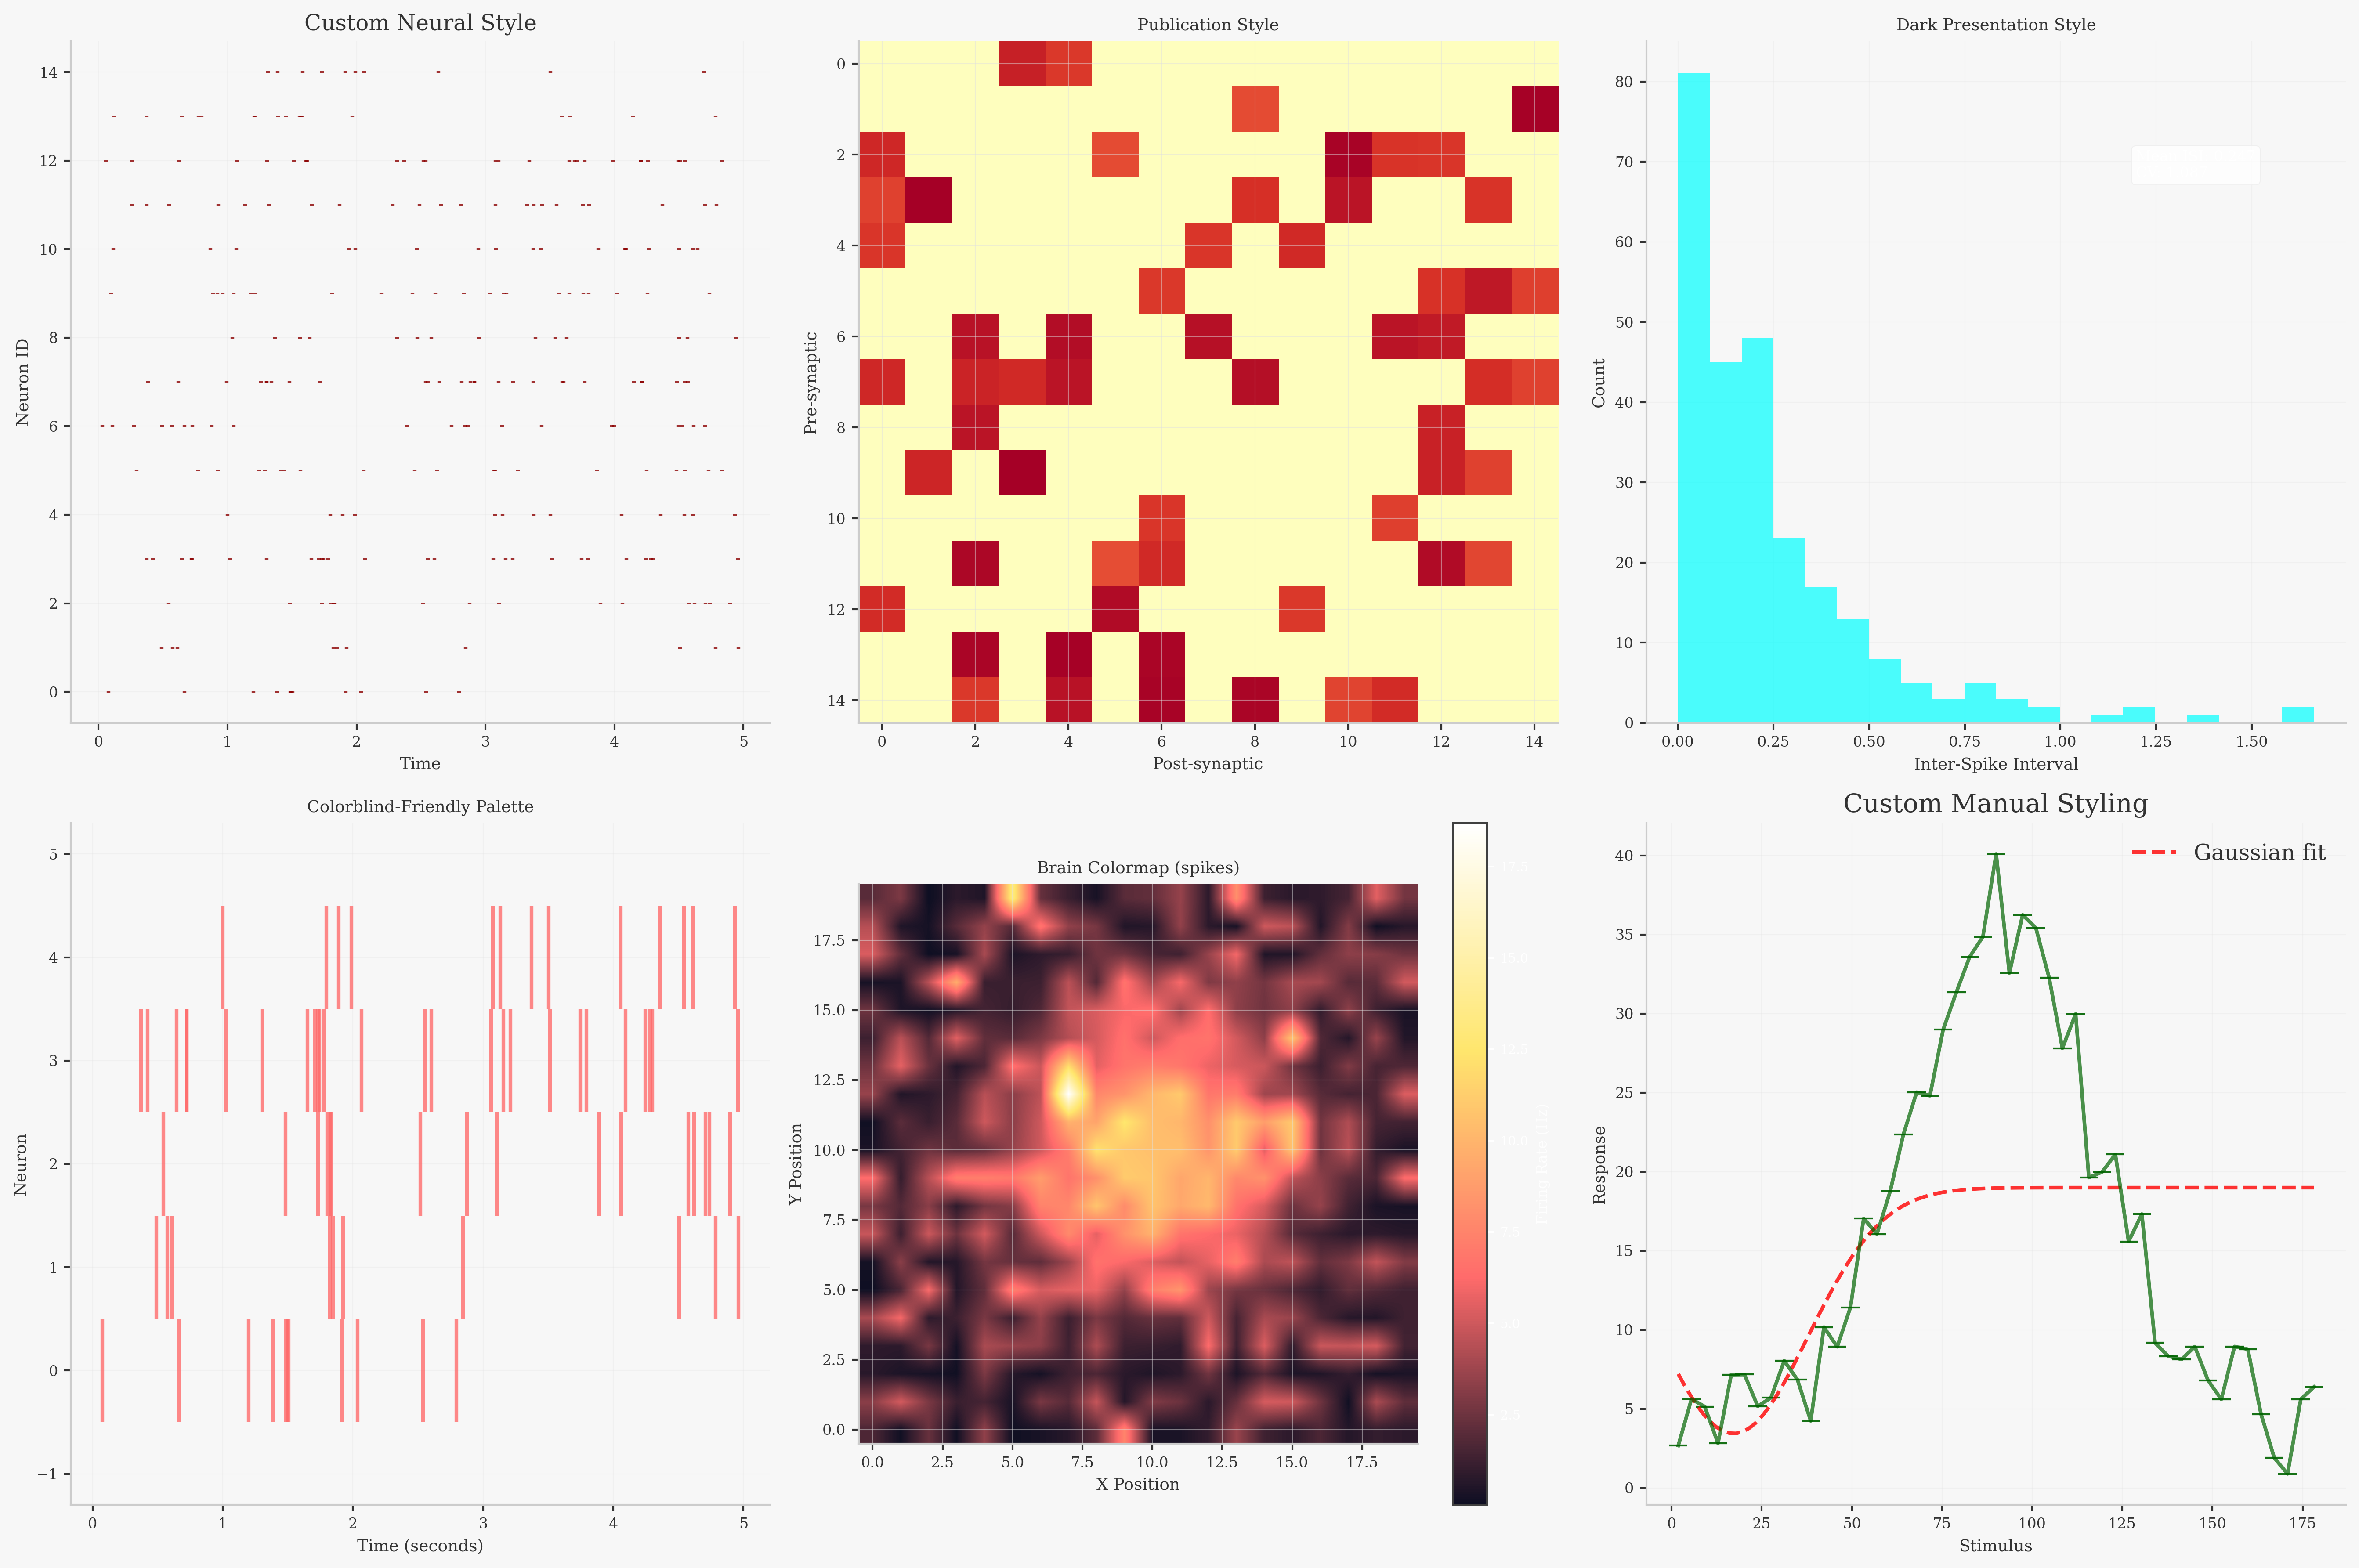


Advanced Styling Features:
- Neural style: Optimized for neural data with scientific colors
- Publication style: High DPI, clean formatting, PDF-ready
- Dark style: High contrast for presentations and screens
- Colorblind-friendly: Accessible color palettes
- Brain colormaps: Specialized for neural data types
- Manual control: Fine-tune every aspect of appearance
- Consistent styling across all plot types
- Easy switching between styles for different contexts


In [9]:
# Demonstrate advanced styling techniques
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Generate sample data for styling demonstration
sample_spikes = [np.sort(np.random.uniform(0, 5, np.random.randint(10, 30))) for _ in range(15)]
sample_connectivity = np.random.rand(15, 15)
sample_connectivity[sample_connectivity < 0.7] = 0
np.fill_diagonal(sample_connectivity, 0)

# 1. Neural style with custom colors
braintools.visualize.neural_style(spike_color='darkred',
                                  membrane_color='darkblue',
                                  background_color='white',
                                  fontsize=10,
                                  grid=True)
braintools.visualize.spike_raster(sample_spikes,
                                  ax=axes[0, 0],
                                  title="Custom Neural Style",
                                  color='darkred',
                                  alpha=0.8)

# 2. Publication style with high DPI
braintools.visualize.publication_style(fontsize=8, dpi=300)
braintools.visualize.connectivity_matrix(sample_connectivity,
                                         ax=axes[0, 1],
                                         title="Publication Style",
                                         cmap='RdYlBu_r',
                                         show_colorbar=False)

# 3. Dark style for presentations
braintools.visualize.dark_style(background_color='#1a1a1a', text_color='white')
braintools.visualize.isi_distribution(sample_spikes,
                                      ax=axes[0, 2],
                                      title="Dark Presentation Style",
                                      bins=20,
                                      color='cyan')

# 4. Colorblind-friendly palette
braintools.visualize.colorblind_friendly_style()
# Generate multiple spike trains for color demonstration
for i, train in enumerate(sample_spikes[:5]):
    axes[1, 0].eventplot([train], lineoffsets=i, linewidth=2, alpha=0.8)
axes[1, 0].set_xlabel('Time (seconds)')
axes[1, 0].set_ylabel('Neuron')
axes[1, 0].set_title('Colorblind-Friendly Palette')
axes[1, 0].grid(True, alpha=0.3)

# 5. Custom brain colormaps
braintools.visualize.brain_colormaps()  # Register custom colormaps
# Create sample firing rate map
rate_map = np.random.exponential(2, (20, 20))
center = 10
y, x = np.ogrid[:20, :20]
dist = np.sqrt((x - center) ** 2 + (y - center) ** 2)
rate_map += 10 * np.exp(-dist ** 2 / 20)

braintools.visualize.firing_rate_map(rate_map,
                                     ax=axes[1, 1],
                                     title="Brain Colormap (spikes)",
                                     cmap='spikes',
                                     show_colorbar=True)

# 6. Custom styling with manual control
# Reset to neural style
braintools.visualize.neural_style()

# Manual customization
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 10,
    'axes.linewidth': 1.5,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'xtick.major.size': 6,
    'ytick.major.size': 6
})

# Generate tuning curve data
orientations = np.linspace(0, 180, 50)
response = 5 + 30 * np.exp(-((orientations - 90) ** 2) / (2 * 25 ** 2))
response += np.random.normal(0, 2, len(orientations))

braintools.visualize.tuning_curve(orientations, response, ax=axes[1, 2],
                                  title="Custom Manual Styling",
                                  bins=orientations, color='darkgreen',
                                  fit_curve='gaussian')

plt.tight_layout()
plt.show()

print("\nAdvanced Styling Features:")
print("- Neural style: Optimized for neural data with scientific colors")
print("- Publication style: High DPI, clean formatting, PDF-ready")
print("- Dark style: High contrast for presentations and screens")
print("- Colorblind-friendly: Accessible color palettes")
print("- Brain colormaps: Specialized for neural data types")
print("- Manual control: Fine-tune every aspect of appearance")
print("- Consistent styling across all plot types")
print("- Easy switching between styles for different contexts")

## Summary

This tutorial covered advanced neural visualization techniques in BrainTools:


- **`neural_trajectory()`**: State-space visualization of neural dynamics
- **`phase_portrait()`**: Dynamical systems analysis with vector fields
- **`network_topology()`**: Complex network structure visualization
- **`tuning_curve()`**: Stimulus selectivity and neural coding analysis

Key Techniques:
- **3D trajectory visualization** with time coloring and custom projections
- **Phase space analysis** revealing dynamical properties and attractors
- **Network topology** with different layouts and community detection
- **Tuning curve analysis** with statistical fitting and error bars
- **Multi-panel dashboards** for comprehensive data exploration
- **Comparative analysis** across experimental conditions
- **Advanced styling** for publication-quality figures

Applications:
- **Dynamical systems analysis** of neural circuits
- **Network neuroscience** and connectivity analysis
- **Sensory coding** and stimulus selectivity studies
- **State-space analysis** of population dynamics
- **Condition comparison** in experimental neuroscience
- **Publication preparation** with professional styling

These advanced visualization techniques provide powerful tools for understanding complex neural dynamics, network organization, and stimulus coding properties. The combination of multiple visualization types in sophisticated dashboards enables comprehensive analysis of neural data from multiple perspectives.